In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

#データの読み込み
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'

df = pd.read_csv(url)

#日本語に変換
columns = ['販売チャネル', '地域', '生鮮食品', '乳製品', '食料品',
           '冷凍食品', '洗剤_紙製品', '総菜']
df.columns = columns

In [3]:
#データ確認
display(df.head())

#サイズ確認
print(df.shape)

,販売チャネル,地域,生鮮食品,乳製品,食料品,冷凍食品,洗剤_紙製品,総菜
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


(440, 8)


In [4]:
#欠損値確認
print(df.isnull().sum())

販売チャネル    0
地域        0
生鮮食品      0
乳製品       0
食料品       0
冷凍食品      0
洗剤_紙製品    0
総菜        0
dtype: int64


In [6]:
#販売チャネルのラベル値確認
print(df['販売チャネル'].value_counts())
print()

#地域のラベル値確認
print(df['地域'].value_counts())

1    298
2    142
Name: 販売チャネル, dtype: int64

3    316
1     77
2     47
Name: 地域, dtype: int64


販売チャネルのラベル値  
1.Horeca (ホテル・レストラン・カフェ)  
2.Retail (小売り)  
  
地域のラベル値  
1.Lisborn(リズボン)  
2.Oporto(オポルト)  
3.Other Region(その他)

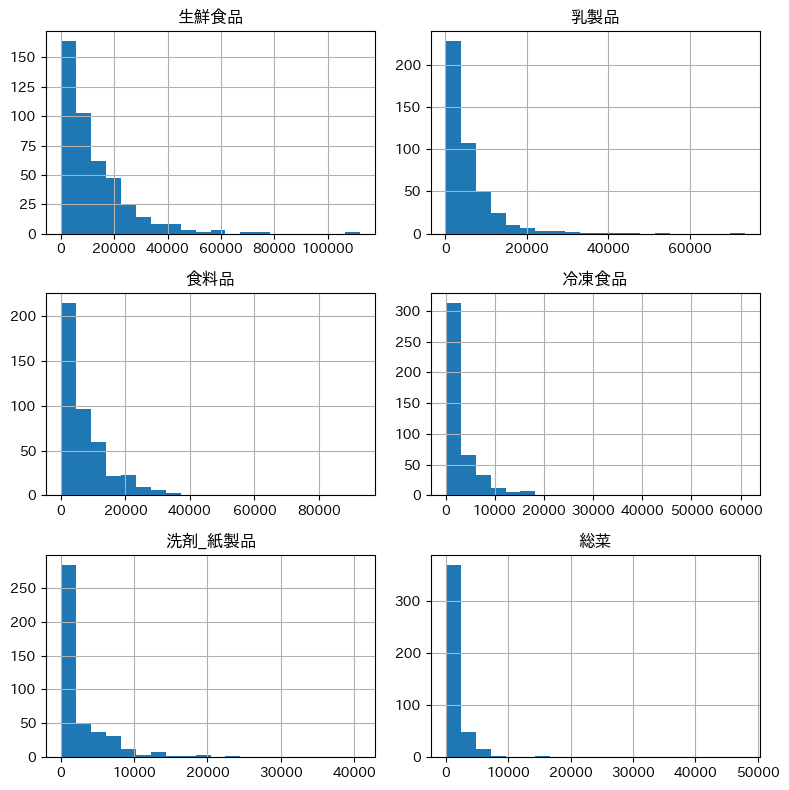

In [7]:
#販売チャネルと地域を落としたデータを作る
df2 = df.drop(['販売チャネル', '地域'], axis=1)

#分析対象項目のヒストグラム表示
from pylab import rcParams
rcParams['figure.figsize'] = (8, 8)
df2.hist(bins=20)
plt.tight_layout()
plt.show()

In [9]:
#データ前処理とデータ分割は不要
random_seed = 123

#アルゴリズムの選択
from sklearn.cluster import KMeans

#グループ数を定義
clusters=4

#アルゴリズムの定義
algorithm = KMeans(n_clusters=clusters,
       random_state=random_seed)

In [11]:
#学習、予測の実施
y_pred = algorithm.fit_predict(df2)

#結果の一部確認
print(y_pred[:20])

[1 2 1 1 0 1 1 1 1 2 2 1 0 2 0 1 2 1 1 1]


In [12]:
#グループごとの平均値計算
df_cluster = df2.groupby(y_pred).mean()
display(df_cluster)

,生鮮食品,乳製品,食料品,冷凍食品,洗剤_紙製品,総菜
0,36144.482759,5471.465517,6128.793103,6298.655172,1064.000000,2316.724138
1,9087.463768,3027.427536,3753.514493,2817.985507,1003.003623,1040.525362
2,4808.842105,10525.010526,16909.789474,1462.589474,7302.400000,1650.884211
3,19888.272727,36142.363636,45517.454545,6328.909091,21417.090909,8414.000000


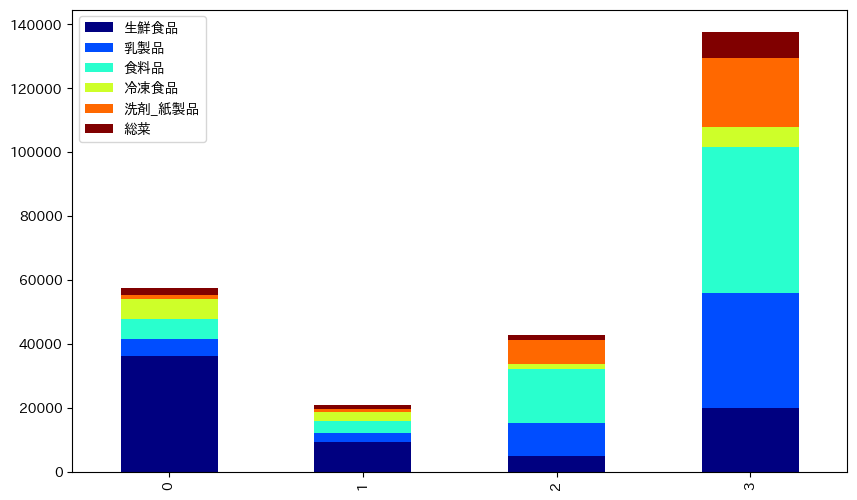

In [13]:
#グループ別の棒グラフ表示
df_cluster.plot(kind='bar', stacked=True,
                figsize=(10,6), colormap='jet')
plt.show()

# グループごとの特徴. 
- グループ3は、全体的に購入金額の高いグループなので「大量グループ」とする     
- グループ1は、すべての項目で購入金額が少ないので「少量グループ」とする.
- グループ０とグループ２は、購入金額に大きい違いはないが項目ごとの内訳に特徴がありそう. 
- グループ０は、生鮮食品の比率が高くなっているので「生鮮グループ」とする    
- グループ2は、食料品の比率が高いので「食料グループ」とする  

==== グループ0 ===


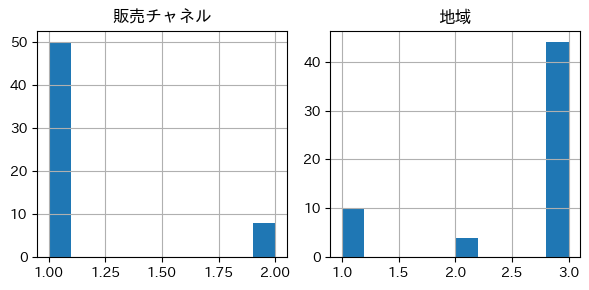

==== グループ1 ===


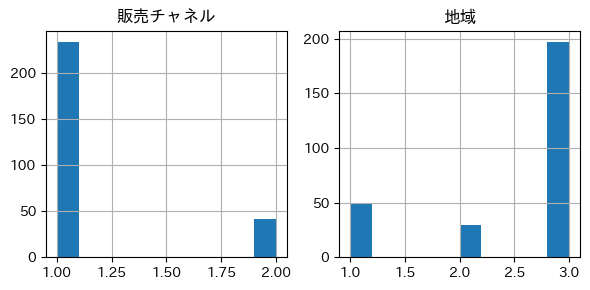

==== グループ2 ===


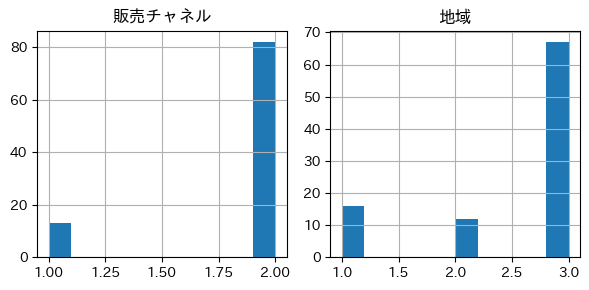

==== グループ3 ===


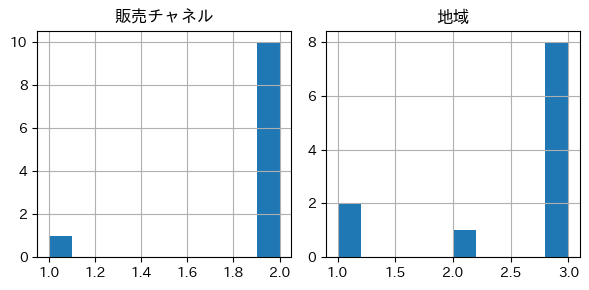

In [15]:
#グループと、チャネル・地域の関係を調べる

#販売チャネルと地域のみをdf3に抽出
df3 = df[['販売チャネル', '地域']]

#グラフの大きさ設定
rcParams['figure.figsize'] = (6,3)

#グループごとのグラフ表示
for i in range(clusters):
    fig, ax = plt.subplots()
    w = df3[y_pred==i]
    print(f'==== グループ{i} ===')
    w.hist(ax=ax)
    plt.tight_layout()
    plt.show()

# グラフの結果. 
- グループ0(生鮮)とグループ３(少量)は、販売チャネル１（ホテル/レストラン/カフェ）と関連が深い. 
- グループ１(食品)とグループ２（大量）は、販売ちゃ